#### Supervised by Mentor Videsh Jagai and implemented by Shannon Walker 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np      # linear algebra
import pandas as pd     # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import os
import scipy
import matplotlib.pyplot as plt
from tabulate import tabulate
import plotly.express as px
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
from category_encoders import OneHotEncoder, MEstimateEncoder, CatBoostEncoder, OrdinalEncoder
from catboost import Pool, CatBoostClassifier
from sklearn.model_selection import StratifiedKFold, RepeatedStratifiedKFold
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from scipy.special import expit as sigmoid  
from sklearn.impute import KNNImputer
from sklearn.base import BaseEstimator, TransformerMixin


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
sns.set_theme(style = 'white', palette = 'viridis')
pal = sns.color_palette('viridis')

from sklearn.metrics import f1_score
pd.set_option('display.max_columns', None)        

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/widsdatathon2024-challenge1/sample_submission.csv
/kaggle/input/widsdatathon2024-challenge1/training.csv
/kaggle/input/widsdatathon2024-challenge1/test.csv


In [2]:
BreastCancer_Train_Data=pd.read_csv(r'/kaggle/input/widsdatathon2024-challenge1/training.csv',)
BreastCancer_Test_Data=pd.read_csv(r'/kaggle/input/widsdatathon2024-challenge1/test.csv',)
Sample_Sub=pd.read_csv(r'/kaggle/input/widsdatathon2024-challenge1/sample_submission.csv')

In [ ]:
#Separating the target variable

target = BreastCancer_Train_Data["DiagPeriodL90D"]
Numer_Only = BreastCancer_Train_Data.drop(["DiagPeriodL90D"],axis =1)
temp_test = BreastCancer_Test_Data
column_names = Numer_Only.columns

In [142]:
BreastCancer_Train_copy = BreastCancer_Train_Data.copy(deep=True)
BreastCancer_Test_copy = BreastCancer_Test_Data.copy(deep=True)

In [143]:
BreastCancer_Train_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12906 entries, 0 to 12905
Data columns (total 83 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   patient_id                             12906 non-null  int64  
 1   patient_race                           6521 non-null   object 
 2   payer_type                             11103 non-null  object 
 3   patient_state                          12855 non-null  object 
 4   patient_zip3                           12906 non-null  int64  
 5   patient_age                            12906 non-null  int64  
 6   patient_gender                         12906 non-null  object 
 7   bmi                                    3941 non-null   float64
 8   breast_cancer_diagnosis_code           12906 non-null  object 
 9   breast_cancer_diagnosis_desc           12906 non-null  object 
 10  metastatic_cancer_diagnosis_code       12906 non-null  object 
 11  me

In [144]:
BreastCancer_Test_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5792 entries, 0 to 5791
Data columns (total 82 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   patient_id                             5792 non-null   int64  
 1   patient_race                           2891 non-null   object 
 2   payer_type                             5032 non-null   object 
 3   patient_state                          5771 non-null   object 
 4   patient_zip3                           5792 non-null   int64  
 5   patient_age                            5792 non-null   int64  
 6   patient_gender                         5792 non-null   object 
 7   bmi                                    1777 non-null   float64
 8   breast_cancer_diagnosis_code           5792 non-null   object 
 9   breast_cancer_diagnosis_desc           5792 non-null   object 
 10  metastatic_cancer_diagnosis_code       5792 non-null   object 
 11  meta

In [145]:
BreastCancer_Train_Data.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [146]:
BreastCancer_Test_Data.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [147]:
BreastCancer_Train_Data.describe().T.style

,count,mean,std,min,25%,50%,75%,max
patient_id,12906.000000,547381.196033,260404.959974,100063.000000,321517.000000,543522.000000,772671.750000,999896.000000
patient_zip3,12906.000000,573.754300,275.447534,101.000000,331.000000,554.000000,846.000000,999.000000
patient_age,12906.000000,59.183326,13.335216,18.000000,50.000000,59.000000,67.000000,91.000000
bmi,3941.000000,28.984539,5.696906,14.000000,24.660000,28.190000,32.920000,85.000000
population,12905.000000,20744.441237,13886.903756,635.545455,9463.896552,19154.190480,30021.278690,71374.131580
density,12905.000000,1581.950419,2966.305306,0.916667,171.857143,700.337500,1666.515385,21172.000000
age_median,12905.000000,40.502259,4.036963,20.600000,37.129825,40.639344,42.934783,54.570000
age_under_10,12905.000000,11.122784,1.512376,0.000000,10.160000,11.039216,12.190000,17.675000
age_10_to_19,12905.000000,12.945265,1.923974,6.314286,11.741176,12.923944,14.019767,35.300000
age_20s,12905.000000,13.290376,3.354103,5.925000,11.013415,12.538095,14.971053,62.100000


In [148]:
BreastCancer_Train_Data.select_dtypes(include=['object']).describe().T

,count,unique,top,freq
patient_race,6521,5,White,3588
payer_type,11103,3,COMMERCIAL,6032
patient_state,12855,50,CA,2438
patient_gender,12906,1,F,12906
breast_cancer_diagnosis_code,12906,50,1749,1982
breast_cancer_diagnosis_desc,12906,50,"Malignant neoplasm of breast (female), unspeci...",1982
metastatic_cancer_diagnosis_code,12906,43,C773,7052
metastatic_first_novel_treatment,24,2,PEMBROLIZUMAB,13
metastatic_first_novel_treatment_type,24,1,Antineoplastics,24
Region,12854,4,South,3919


In [40]:
BreastCancer_Test_Data.describe().T.style

,count,mean,std,min,25%,50%,75%,max
patient_id,5792.000000,549946.787983,260988.833446,100266.000000,320284.500000,553042.000000,778552.250000,999890.000000
patient_zip3,5792.000000,570.217887,275.314510,101.000000,329.000000,554.000000,836.000000,996.000000
patient_age,5792.000000,59.274862,13.076323,18.000000,50.000000,59.000000,67.000000,91.000000
bmi,1777.000000,28.900073,5.609491,14.000000,24.600000,28.150000,32.860000,43.900000
population,5792.000000,20266.872152,13694.738314,829.515152,8863.550000,18711.016665,28996.772730,71374.131580
density,5792.000000,1510.471786,2883.409750,0.821739,161.925000,626.236667,1612.851111,21172.000000
age_median,5792.000000,40.575472,4.029852,20.600000,37.190476,40.640909,43.085938,54.570000
age_under_10,5792.000000,11.119250,1.478579,0.000000,10.160000,11.039216,12.143396,16.481818
age_10_to_19,5792.000000,12.919191,1.909698,6.314286,11.726471,12.923944,13.904830,35.300000
age_20s,5792.000000,13.218348,3.294389,5.925000,10.996226,12.531646,14.937500,62.100000


In [149]:
BreastCancer_Test_Data.select_dtypes(include=['object']).describe().T

,count,unique,top,freq
patient_race,2891,5,White,1606
payer_type,5032,3,COMMERCIAL,2759
patient_state,5771,46,CA,1047
patient_gender,5792,1,F,5792
breast_cancer_diagnosis_code,5792,46,1749,906
breast_cancer_diagnosis_desc,5792,46,"Malignant neoplasm of breast (female), unspeci...",906
metastatic_cancer_diagnosis_code,5792,36,C773,3171
metastatic_first_novel_treatment,11,2,PEMBROLIZUMAB,6
metastatic_first_novel_treatment_type,11,1,Antineoplastics,11
Region,5771,4,South,1840


In [150]:
BreastCancer_Train_Data.head(10)

,patient_id,patient_race,payer_type,patient_state,patient_zip3,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,metastatic_cancer_diagnosis_code,metastatic_first_novel_treatment,metastatic_first_novel_treatment_type,Region,Division,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_household_six_figure,income_individual_median,home_ownership,housing_units,home_value,rent_median,rent_burden,education_less_highschool,education_highschool,education_some_college,education_bachelors,education_graduate,education_college_or_above,education_stem_degree,labor_force_participation,unemployment_rate,self_employed,farmer,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D
0,475714,NaN,MEDICAID,CA,924,84,F,NaN,C50919,Malignant neoplasm of unsp site of unspecified...,C7989,NaN,NaN,West,Pacific,31437.750000,1189.562500,30.642857,16.014286,15.542857,17.614286,14.014286,11.614286,11.557143,7.571429,4.000000,2.100000,49.857143,50.142857,36.571429,11.885714,47.114286,4.442857,3.928571,52.228571,52996.28571,3.142857,4.000000,6.157143,5.142857,6.271429,10.142857,13.300000,20.000000,12.742857,11.571429,7.528571,19.100000,24563.57143,44.585714,8674.500000,2.646343e+05,1165.000000,37.442857,33.257143,29.200000,25.914286,8.357143,3.257143,11.614286,39.557143,61.528571,8.471429,13.428571,0.000000,44.100000,13.100000,5.100000,1.485714,0.342857,27.114286,8.757143,66.685714,12.871429,22.542857,10.100000,27.814286,11.200000,3.500000,52.237210,8.650555,18.606528,1
1,349367,White,COMMERCIAL,CA,928,62,F,28.49,C50411,Malig neoplm of upper-outer quadrant of right ...,C773,NaN,NaN,West,Pacific,39121.878790,2295.939394,38.200000,11.878788,13.354545,14.230303,13.418182,13.333333,14.060606,10.248485,5.951515,3.503030,49.893939,50.106061,50.245455,9.827273,35.290909,4.651515,3.622727,61.736364,102741.63640,2.327273,1.536364,2.648485,2.178788,2.409091,5.163636,7.972727,13.936364,12.469697,19.760606,29.596970,49.357576,41287.27273,61.463636,11725.666670,6.776885e+05,2003.125000,34.753125,14.230303,19.987879,29.796970,23.739394,12.245455,35.984848,47.918182,65.230303,5.103030,15.224242,0.027273,54.030303,2.527273,20.827273,0.587879,0.300000,11.645455,10.081818,37.948485,8.957576,10.109091,8.057576,30.606061,7.018182,4.103030,42.301121,8.487175,20.113179,1
2,138632,White,COMMERCIAL,TX,760,43,F,38.09,C50112,Malignant neoplasm of central portion of left ...,C773,NaN,NaN,South,West South Central,21996.683330,626.236667,37.906667,13.028333,14.463333,12.531667,13.545000,12.860000,12.770000,11.426667,6.565000,2.811667,50.123333,49.876667,55.753333,12.330000,27.195000,4.710000,3.260667,55.801667,85984.74138,2.483333,1.305000,2.716667,2.938333,2.766667,6.763333,12.061667,15.835000,13.560000,20.875000,18.680000,39.555000,40399.03333,72.745000,7786.583333,2.377131e+05,1235.907407,29.358491,10.811667,27.038333,32.368333,19.678333,10.115000,29.793333,37.308475,66.428333,4.560000,13.722034,3.650847,75.820000,9.231667,3.618333,0.463333,0.146667,3.816667,6.898333,19.370000,11.253333,9.663333,3.356667,31.394915,15.066667,7.446667,40.108207,7.642753,14.839351,1
3,617843,White,COMMERCIAL,CA,926,45,F,NaN,C50212,Malig neoplasm of upper-inner quadrant of left...,C773,NaN,NaN,West,Pacific,32795.325580,1896.220930,42.871429,10.071429,12.135714,12.538095,12.464286,12.650000,14.847619,12.280952,8.216667,4.759524,49.066667,50.933333,52.604762,11.623810,31.142857,

- A data type object (an instance of numpy. dtype class) describes how the bytes in the fixed-size block of memory corresponding to an array item should be interpreted.It describes the following aspects of the data: Type of the data (integer, float, Python object, etc.)

- The all() function returns True if all items in an iterable are true, otherwise it returns False.If the iterable object is empty, the all() function also returns True.


In [151]:
all_nan_cols = BreastCancer_Train_Data.columns[BreastCancer_Train_Data.isna().any()]
all_nan_cols

Index(['patient_race', 'payer_type', 'patient_state', 'bmi',
       'metastatic_first_novel_treatment',
       'metastatic_first_novel_treatment_type', 'Region', 'Division',
       'population', 'density', 'age_median', 'age_under_10', 'age_10_to_19',
       'age_20s', 'age_30s', 'age_40s', 'age_50s', 'age_60s', 'age_70s',
       'age_over_80', 'male', 'female', 'married', 'divorced', 'never_married',
       'widowed', 'family_size', 'family_dual_income',
       'income_household_median', 'income_household_under_5',
       'income_household_5_to_10', 'income_household_10_to_15',
       'income_household_15_to_20', 'income_household_20_to_25',
       'income_household_25_to_35', 'income_household_35_to_50',
       'income_household_50_to_75', 'income_household_75_to_100',
       'income_household_100_to_150', 'income_household_150_over',
       'income_household_six_figure', 'income_individual_median',
       'home_ownership', 'housing_units', 'home_value', 'rent_median',
       'rent_b

In [152]:
all_nan_cols = BreastCancer_Test_Data.columns[BreastCancer_Test_Data.isna().any()]
all_nan_cols

Index(['patient_race', 'payer_type', 'patient_state', 'bmi',
       'metastatic_first_novel_treatment',
       'metastatic_first_novel_treatment_type', 'Region', 'Division',
       'family_size', 'family_dual_income', 'income_household_median',
       'income_household_under_5', 'income_household_5_to_10',
       'income_household_10_to_15', 'income_household_15_to_20',
       'income_household_20_to_25', 'income_household_25_to_35',
       'income_household_35_to_50', 'income_household_50_to_75',
       'income_household_75_to_100', 'income_household_100_to_150',
       'income_household_150_over', 'income_household_six_figure',
       'home_ownership', 'home_value', 'rent_median', 'rent_burden',
       'self_employed', 'farmer', 'poverty', 'limited_english', 'Ozone',
       'PM25', 'N02'],
      dtype='object')

- Percentage distribution Nan-Value representation within the Train Breast Cancer Data-Set.

In [153]:
for column in BreastCancer_Train_Data.columns:
  NaN_Count = BreastCancer_Train_Data[column].isna().sum()
  if NaN_Count > 0:
    Per_NaN = (NaN_Count/len(BreastCancer_Train_Data))*100
    print(f'{column} : {Per_NaN : .2f}% NaN  Distribution')

patient_race :  49.47% NaN  Distribution
payer_type :  13.97% NaN  Distribution
patient_state :  0.40% NaN  Distribution
bmi :  69.46% NaN  Distribution
metastatic_first_novel_treatment :  99.81% NaN  Distribution
metastatic_first_novel_treatment_type :  99.81% NaN  Distribution
Region :  0.40% NaN  Distribution
Division :  0.40% NaN  Distribution
population :  0.01% NaN  Distribution
density :  0.01% NaN  Distribution
age_median :  0.01% NaN  Distribution
age_under_10 :  0.01% NaN  Distribution
age_10_to_19 :  0.01% NaN  Distribution
age_20s :  0.01% NaN  Distribution
age_30s :  0.01% NaN  Distribution
age_40s :  0.01% NaN  Distribution
age_50s :  0.01% NaN  Distribution
age_60s :  0.01% NaN  Distribution
age_70s :  0.01% NaN  Distribution
age_over_80 :  0.01% NaN  Distribution
male :  0.01% NaN  Distribution
female :  0.01% NaN  Distribution
married :  0.01% NaN  Distribution
divorced :  0.01% NaN  Distribution
never_married :  0.01% NaN  Distribution
widowed :  0.01% NaN  Distributi

In [154]:
for column in BreastCancer_Test_Data.columns:
  NaN_Count = BreastCancer_Test_Data[column].isna().sum()
  if NaN_Count > 0:
    Per_NaN = (NaN_Count/len(BreastCancer_Test_Data))*100
    print(f'{column} : {Per_NaN : .2f}% NaN  Distribution')

patient_race :  50.09% NaN  Distribution
payer_type :  13.12% NaN  Distribution
patient_state :  0.36% NaN  Distribution
bmi :  69.32% NaN  Distribution
metastatic_first_novel_treatment :  99.81% NaN  Distribution
metastatic_first_novel_treatment_type :  99.81% NaN  Distribution
Region :  0.36% NaN  Distribution
Division :  0.36% NaN  Distribution
family_size :  0.02% NaN  Distribution
family_dual_income :  0.02% NaN  Distribution
income_household_median :  0.02% NaN  Distribution
income_household_under_5 :  0.02% NaN  Distribution
income_household_5_to_10 :  0.02% NaN  Distribution
income_household_10_to_15 :  0.02% NaN  Distribution
income_household_15_to_20 :  0.02% NaN  Distribution
income_household_20_to_25 :  0.02% NaN  Distribution
income_household_25_to_35 :  0.02% NaN  Distribution
income_household_35_to_50 :  0.02% NaN  Distribution
income_household_50_to_75 :  0.02% NaN  Distribution
income_household_75_to_100 :  0.02% NaN  Distribution
income_household_100_to_150 :  0.02% N

- Generation of heatmap showcasing the following NAN-value Distrbution within the following DataSets{: Train & Test}.

<Axes: >

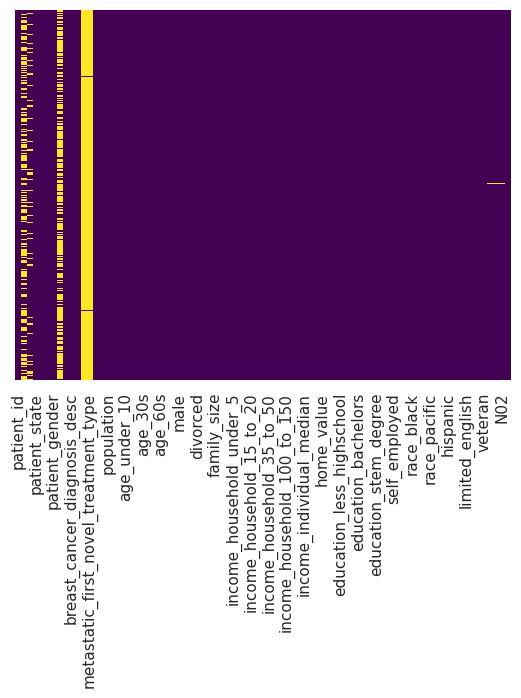

In [155]:
sns.heatmap(BreastCancer_Train_Data.isna(),yticklabels=False,cbar=False,cmap="viridis")

<Axes: >

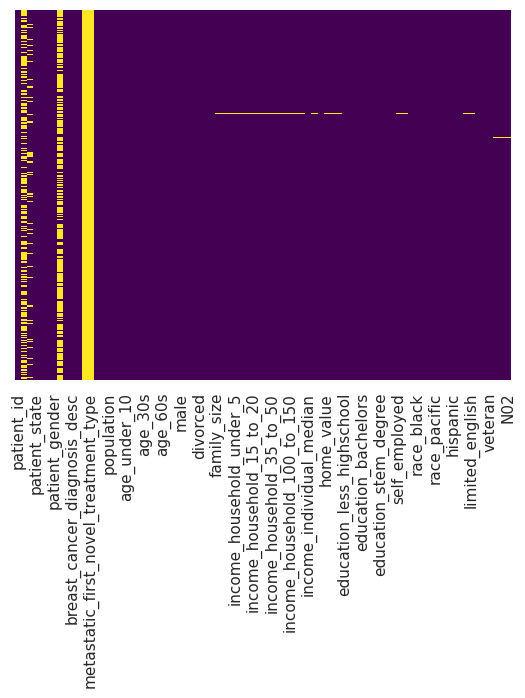

In [156]:
sns.heatmap(BreastCancer_Test_Data.isna(),yticklabels=False,cbar=False,cmap="viridis")

In [157]:
#Let's check unique values in each Categorical column
Cateog_Col = BreastCancer_Train_Data.select_dtypes(include=['object'])

for column in Cateog_Col:
    print(f"The  respective List object column  '{column}':")
    Value_Co = BreastCancer_Train_Data[column].value_counts().head(15)
    Total_Co = len(BreastCancer_Train_Data[column])
    data = []
    
    for Val, Count in Value_Co.items():
        Percen = (Count / Total_Co ) * 100
        data.append([Val, Count, f"{Percen:.3f}%"])
    Hea_Nam = ["ListObject Column", "Count", "Percentage"]
    print(tabulate(data, headers=Hea_Nam, tablefmt="psql"))
    print('=' * 50)


The  respective List object column  'patient_race':
+---------------------+---------+--------------+
| ListObject Column   |   Count | Percentage   |
|---------------------+---------+--------------|
| White               |    3588 | 27.801%      |
| Black               |    1056 | 8.182%       |
| Hispanic            |     829 | 6.423%       |
| Other               |     683 | 5.292%       |
| Asian               |     365 | 2.828%       |
+---------------------+---------+--------------+
The  respective List object column  'payer_type':
+---------------------+---------+--------------+
| ListObject Column   |   Count | Percentage   |
|---------------------+---------+--------------|
| COMMERCIAL          |    6032 | 46.738%      |
| MEDICAID            |    2569 | 19.905%      |
| MEDICARE ADVANTAGE  |    2502 | 19.386%      |
+---------------------+---------+--------------+
The  respective List object column  'patient_state':
+---------------------+---------+--------------+
| ListObject

## Explanatory Data Analysis and Data on Missing Values(NAN) in our Train and Test DataSet.

In [52]:
##Filling in NAN Values with  mean() computation in the Train Breast Cancer Data 
#Set via method Dictionary
Train_NanVal_DataS = [k for k, v in dict(BreastCancer_Train_Data.isna().mean()).items() if v>0]
Train_NanVal_DataS 
# The following showcases the list of columns with NAN values accordingly.

['patient_race',
 'payer_type',
 'patient_state',
 'bmi',
 'metastatic_first_novel_treatment',
 'metastatic_first_novel_treatment_type',
 'Region',
 'Division',
 'population',
 'density',
 'age_median',
 'age_under_10',
 'age_10_to_19',
 'age_20s',
 'age_30s',
 'age_40s',
 'age_50s',
 'age_60s',
 'age_70s',
 'age_over_80',
 'male',
 'female',
 'married',
 'divorced',
 'never_married',
 'widowed',
 'family_size',
 'family_dual_income',
 'income_household_median',
 'income_household_under_5',
 'income_household_5_to_10',
 'income_household_10_to_15',
 'income_household_15_to_20',
 'income_household_20_to_25',
 'income_household_25_to_35',
 'income_household_35_to_50',
 'income_household_50_to_75',
 'income_household_75_to_100',
 'income_household_100_to_150',
 'income_household_150_over',
 'income_household_six_figure',
 'income_individual_median',
 'home_ownership',
 'housing_units',
 'home_value',
 'rent_median',
 'rent_burden',
 'education_less_highschool',
 'education_highschool',
 '

In [53]:
# The following is the number of list objects NaN value object columns representing within Train Breast Cancer DataSet.
print('The cateogorised number of columns with NaN values within Train DataSet', len(Train_NanVal_DataS))

The cateogorised number of columns with NaN values within Train DataSet 75


- Percentage Representation of NAN values greater than or equal to **(>=.50)** categorised  {**Train_NanVal_DatsS**} extrapolated Train DataSet.

In [54]:
## Percentage Representation of NAN values greater which categorised 50% 
##{:Train_NanVal_DataS} extrapolated Train DataSet.
Train_NanVal_Ov50_DataS = [k for k, v in dict(BreastCancer_Train_Data.isna().mean()).items() if v>=0.5] # Filter and categorised columns (>0.5) NAN Values
BreastCancer_Train_Data[Train_NanVal_Ov50_DataS].isna().mean()*100

bmi                                      69.463815
metastatic_first_novel_treatment         99.814040
metastatic_first_novel_treatment_type    99.814040
dtype: float64

In [55]:
## Percentage Representation of NAN values categorised greater 
##than or equal to (>=.50){Test_NanVal_DatS} extrapolated from DataSet.
Test_NanVal_Ov50_DataS = [k for k, v in dict(BreastCancer_Test_Data.isna().mean()).items() if v>=0.5]
BreastCancer_Test_Data[Test_NanVal_Ov50_DataS].isna().mean()*100

patient_race                             50.086326
bmi                                      69.319751
metastatic_first_novel_treatment         99.810083
metastatic_first_novel_treatment_type    99.810083
dtype: float64

- Dropping our list object columns in our DataFrame: **Train_NanVal_Ov50_DataS & Test_NanVal_Ov50_DataS**.

In [56]:
BreastCancer_Train_Data[Train_NanVal_Ov50_DataS].isna().mean().reset_index()

,index,0
0,bmi,0.694638
1,metastatic_first_novel_treatment,0.998140
2,metastatic_first_novel_treatment_type,0.998140


In [57]:
BreastCancer_Test_Data[Test_NanVal_Ov50_DataS].isna().mean().reset_index()

,index,0
0,patient_race,0.500863
1,bmi,0.693198
2,metastatic_first_novel_treatment,0.998101
3,metastatic_first_novel_treatment_type,0.998101


Beneficiaries incoporating the library **plotly**

   - **Tip 1**: Enchancement overall background graphical visualisation with usage of template.

   -  **Tip 2**: The incoporation of using HTML in tile/subtilte.
   
   - **Tip 3**: Preparation of DataFrame before generating the chart.

   - **Tip 4**: Formatation of data Label includsion.

   - **Tip 5**: The incorporation to hide x/y title.

   - **Tip 6**: Highlights certain data points.

- Graphical Representation of BreastCancer Train & Test DataSets particularly, numerical classification, of **NaN-Values** (>=.50%) within the list object columns.

In [58]:
Train_NanVal_Ov50_Bar_fig = px.bar(BreastCancer_Train_Data[Train_NanVal_Ov50_DataS].isna().mean().reset_index(), title="Train columns greater than or equal to (>=.50) of NAN Values",text_auto=True,template='seaborn', x='index', y=0, labels={'index':'Train_Data_ListColumns','0':'NaN-Value Distribution'})
Train_NanVal_Ov50_Bar_fig

In [59]:
Test_NanVal_Ov50_Bar_fig= px.bar(BreastCancer_Test_Data[Test_NanVal_Ov50_DataS].isna().mean().reset_index(), x='index', text_auto=True, y=0, template='seaborn', labels={'index':'Test_Data_List Columns','0':'Nan Value Distribution'})
Test_NanVal_Ov50_Bar_fig

- Filtering of both Train and Test DataSet whereby categorising less than (<.01) NaN-value Distrbibution .

In [60]:
Train_NanVal_Les01_DataS=[k for k, v in dict(BreastCancer_Train_Data.isna().mean()).items() if v>0 and v<0.01]
BreastCancer_Train_Data[Train_NanVal_Les01_DataS].isna().mean()*100

patient_state       0.395165
Region              0.402913
Division            0.402913
population          0.007748
density             0.007748
                      ...   
health_uninsured    0.007748
veteran             0.007748
Ozone               0.224702
PM25                0.224702
N02                 0.224702
Length: 70, dtype: float64

In [61]:
BreastCancer_Train_Data[Train_NanVal_Les01_DataS].isna().mean().reset_index()

,index,0
0,patient_state,0.003952
1,Region,0.004029
2,Division,0.004029
3,population,0.000077
4,density,0.000077
...,...,...
65,health_uninsured,0.000077
66,veteran,0.000077
67,Ozone,0.002247
68,PM25,0.002247


In [62]:
Test_NanVal_Les01_DataS=[k for k, v in dict(BreastCancer_Test_Data.isna().mean()).items() if v>0 and v<0.01]
BreastCancer_Test_Data[Test_NanVal_Les01_DataS].isna().mean()*100

patient_state                  0.362569
Region                         0.362569
Division                       0.362569
family_size                    0.017265
family_dual_income             0.017265
income_household_median        0.017265
income_household_under_5       0.017265
income_household_5_to_10       0.017265
income_household_10_to_15      0.017265
income_household_15_to_20      0.017265
income_household_20_to_25      0.017265
income_household_25_to_35      0.017265
income_household_35_to_50      0.017265
income_household_50_to_75      0.017265
income_household_75_to_100     0.017265
income_household_100_to_150    0.017265
income_household_150_over      0.017265
income_household_six_figure    0.017265
home_ownership                 0.017265
home_value                     0.017265
rent_median                    0.017265
rent_burden                    0.017265
self_employed                  0.017265
farmer                         0.017265
poverty                        0.017265


In [63]:
BreastCancer_Test_Data[Test_NanVal_Les01_DataS].isna().mean().reset_index()

,index,0
0,patient_state,0.003626
1,Region,0.003626
2,Division,0.003626
3,family_size,0.000173
4,family_dual_income,0.000173
5,income_household_median,0.000173
6,income_household_under_5,0.000173
7,income_household_5_to_10,0.000173
8,income_household_10_to_15,0.000173
9,income_household_15_to_20,0.000173


- Graphical Representation of BreastCancer Train & Test DataSets particularly, numerical classification, of **NaN-Values** (<.01) within the list object columns.

In [64]:
Train_NanVal_Les01_Bar_fig=px.bar(BreastCancer_Train_Data[Train_NanVal_Les01_DataS].isna().mean().reset_index(), text_auto=True,title='Train Columns less than 1% of NAN Values', template='seaborn', x='index', y=0, labels={'index':'Train_Data_ListColumn','0':'Nan-Value Distribution'})
Train_NanVal_Les01_Bar_fig

In [65]:
Test_NanVal_Les01_DataS_Bar_fig= px.bar(BreastCancer_Test_Data[Test_NanVal_Les01_DataS].isna().mean().reset_index(),x='index',y=0, title='Test Columns with Less than 1% of NAN-Value Distribution', template='seaborn', labels={'index':'Test_Data_ListColumns', '0':'Nan-Value Distribution' })
Test_NanVal_Les01_DataS_Bar_fig

-  Investigational Analysis on the Categorical Classification of both Train and Test Data-Set within the NAN-Value Distribution.

In [66]:
Train_NanVal_Les50_DataS=[k for k, v in dict(BreastCancer_Train_Data.isna().mean()).items() if v>0 and v<0.5]
BreastCancer_Train_Data[Train_NanVal_Les50_DataS].isna().mean()*100

patient_race        49.473113
payer_type          13.970246
patient_state        0.395165
Region               0.402913
Division             0.402913
                      ...    
health_uninsured     0.007748
veteran              0.007748
Ozone                0.224702
PM25                 0.224702
N02                  0.224702
Length: 72, dtype: float64

In [68]:
Nan_Ov50ValDis_Categ_Feat_= BreastCancer_Train_Data[Train_NanVal_Les50_DataS].select_dtypes('object').columns.to_list()


In [69]:
for x in Nan_Ov50ValDis_Categ_Feat_:
  print('BreastCancer_Train_Data',x,BreastCancer_Train_Data[x].unique())

BreastCancer_Train_Data patient_race [nan 'White' 'Other' 'Hispanic' 'Asian' 'Black']
BreastCancer_Train_Data payer_type ['MEDICAID' 'COMMERCIAL' 'MEDICARE ADVANTAGE' nan]
BreastCancer_Train_Data patient_state ['CA' 'TX' 'ID' 'NY' 'IL' nan 'MI' 'OR' 'MT' 'KY' 'OH' 'IN' 'FL' 'CO' 'GA'
 'VA' 'MD' 'KS' 'WI' 'PA' 'NM' 'WA' 'MN' 'NC' 'AL' 'SC' 'LA' 'IA' 'TN'
 'HI' 'NE' 'AZ' 'MO' 'NV' 'SD' 'DC' 'AR' 'UT' 'WV' 'ND' 'OK' 'WY' 'DE'
 'NJ' 'MS' 'AK' 'PR' 'RI' 'CT' 'NH' 'MA']
BreastCancer_Train_Data Region ['West' 'South' 'Northeast' 'Midwest' nan]
BreastCancer_Train_Data Division ['Pacific' 'West South Central' 'Mountain' 'Middle Atlantic'
 'East North Central' nan 'East South Central' 'South Atlantic'
 'West North Central' 'New England']


In [70]:
BreastCancer_Train_Data[Nan_Ov50ValDis_Categ_Feat_].describe()

,patient_race,payer_type,patient_state,Region,Division
count,6521,11103,12855,12854,12854
unique,5,3,50,4,9
top,White,COMMERCIAL,CA,South,East North Central
freq,3588,6032,2438,3919,2923


##### Exploration and visulisation underlying relationships  factors of the patient Scio-econonmic status [**Demographic Data**],Racial Lineage, Age Grouping, BMI [**Characteristics Data**] in addition the air quality data(e.g.Ozone, PM25 and NO2) [**Environmental Condition**].

- As such, keeping the patient's Diagnosis Period{DiagPeriodL90D(:**Target Variable)** along the y-axis since its the predictor variable for this project. This variable indicates diagonsis period whereby cancer diagnoses with less than 90 days(Yes: 1,No: 0)
[Categorised Representation] of **Target variable**.

- Hence the above critical covariates features column  aforementioned above; i) **demographic**,ii) **charactertics**, iii) **environmental conditions** influence or intercept the peatient's diagnosis treatment period accordingly.Therefore, such invetigation and conductions emerged from such particular features found the most variance on the treatment Diagnosis period.



In [158]:
#Exploration of patient whose within 90 days or less(:<90 ) diagnosis treatment period[Target Variable in our DataSet].
# Exploit the distribution percentage of Target Vriable in our DataSet.
print(BreastCancer_Train_Data['DiagPeriodL90D'].value_counts(normalize=True)*100)

DiagPeriodL90D
1    62.451573
0    37.548427
Name: proportion, dtype: float64


([<matplotlib.axis.YTick at 0x7d869ddfd8d0>,
 [Text(0, 0, 'Diag_Period_Less90D'), Text(0, 1, 'Diag_Period_Greater_90D')])

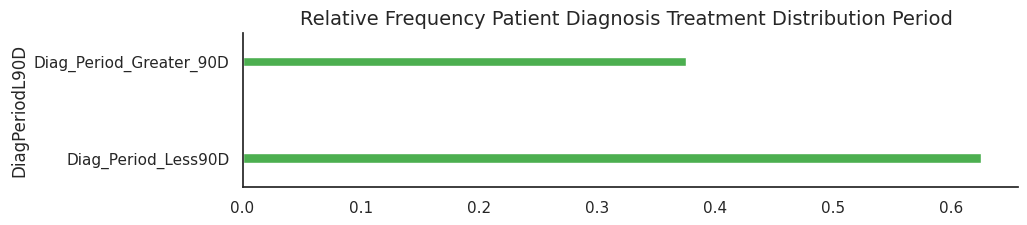

In [159]:
#Horizontal Barplot showcasing Relative Frequency Patient Diagnosis Treatmentment Distribution of unique values.
BreastCancer_Train_Data['DiagPeriodL90D'].value_counts(normalize=True).plot(kind='barh',color='#4CAF50',width=0.1,figsize=(10,2)).spines[['top', 'right']].set_visible(False)
plt.title('Relative Frequency Patient Diagnosis Treatment Distribution Period ',fontsize=14)
plt.yticks(ticks=[0,1],labels=['Diag_Period_Less90D','Diag_Period_Greater_90D'])

##### Overview of the Target Variable **DiagPeriodL90D** in accordance with the Patient's age (**patient_age**) whom either remained within or less than or preached over the Diagnosis Treatment Period of 90 days.

In [160]:
PatAge_F =BreastCancer_Train_Data[['DiagPeriodL90D','patient_age']].groupby('DiagPeriodL90D').value_counts()
PatAge_F

DiagPeriodL90D  patient_age
0               82             297
                63             194
                60             187
                62             178
                58             174
                              ... 
1               23               5
                24               5
                25               5
                20               4
                21               3
Name: count, Length: 129, dtype: int64

#### Distribution of Patient in accordance Treatment Distrbution Period that within the  fixed 90 days period or less...

In [161]:
BreastCancer_FiltDiaPL90 = BreastCancer_Train_Data[BreastCancer_Train_Data['DiagPeriodL90D']==1]


#### Distribution of Patient in accordance Treatment Distrbution Period that preached over the 90 days period..

In [162]:
BreastCancer_FiltDiaOv90 = BreastCancer_Train_Data[BreastCancer_Train_Data['DiagPeriodL90D']==0]

### Age Distribution of Patients within Diagnosis Treatment Period of <90 days.

In [163]:
Per_AgeDiagPerL90=BreastCancer_FiltDiaPL90.patient_age.value_counts(normalize=True)*100
Per_AgeDiagPerL90

patient_age
64    3.784119
59    3.548387
57    3.535980
60    3.523573
61    3.511166
        ...   
25    0.062035
24    0.062035
19    0.062035
20    0.049628
21    0.037221
Name: proportion, Length: 67, dtype: float64

#### Relative Frequency Distribution Percentage of the Diagnosis Treatment preached Treatment Period.

In [164]:
Per_AgeDiagPerOv90=BreastCancer_FiltDiaOv90.patient_age.value_counts(normalize=True)*100
Per_AgeDiagPerOv90

patient_age
82    6.128766
63    4.003302
60    3.858853
62    3.673132
58    3.590590
        ...   
79    0.103178
25    0.082542
24    0.082542
26    0.020636
23    0.020636
Name: proportion, Length: 62, dtype: float64

### Age Distribution of Patients within Diagnosis Treatment Period of <90 days.


In [165]:
## Age Distribution of Patients within Diagnosis Treatment Period of <90 days.
Fig_Rel_FreqDis_PatAg= px.bar(Per_AgeDiagPerL90, text_auto=True, labels={'index':'patient_age','value':'Relative Frequency Value Distribution'}, title='Age Distribution of Patients within Diagnosis Treatment Period of <90 days',)
Fig_Rel_FreqDis_PatAg


## Age Distribution of Patients preaching Diagnosis Treatment Period of >90 days.



In [166]:
## Age Distribution of Patients preaching Diagnosis Treatment Period of >90 days.
Fig_Rel_FreqDis_OvPatAg= px.bar(Per_AgeDiagPerOv90,text_auto=True, labels={'index':'patient_age','value':'Relative Frequency Value Distribution'}, title='Age Distribution of Patients within Diagnosis Treatment Period of <90 days', barmode="relative",)
Fig_Rel_FreqDis_OvPatAg

In [167]:
PatRac_F= BreastCancer_Train_Data[['DiagPeriodL90D','patient_race']].groupby('DiagPeriodL90D').value_counts()
PatRac_F

DiagPeriodL90D  patient_race
0               White           1223
                Black            408
                Hispanic         305
                Other            255
                Asian            135
1               White           2365
                Black            648
                Hispanic         524
                Other            428
                Asian            230
Name: count, dtype: int64

In [168]:
BreastCancer_FiltDiaPL90.patient_race.value_counts(normalize=True)*100

patient_race
White       56.376639
Black       15.446961
Hispanic    12.491061
Other       10.202622
Asian        5.482718
Name: proportion, dtype: float64

<Axes: ylabel='patient_race'>

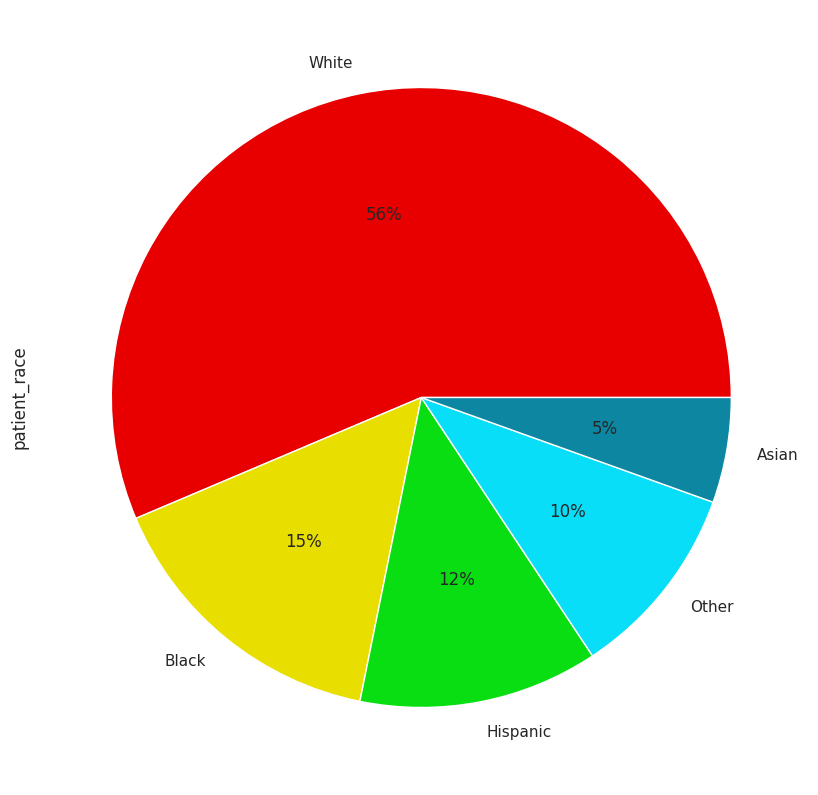

In [169]:
BreastCancer_FiltDiaPL90.patient_race.value_counts(normalize=True).plot(kind='pie',ylabel='patient_race',figsize=(10,15),y=[0,1],autopct='%1.0f%%',colors = ['#e80000', '#e8de00','#09de13','#09def8','#0d86a2'])

#### Explorational Analysis as the classification of the Data-Set into the **Numerical and Categorical Data**  initiates.

## Transformers using classes 


## Optional Method:

In [ ]:
# Import Library to build custom machine learning models or transformers using scikit-learn. 
from sklearn.base import BaseEstimator, TransformerMixin

In [ ]:
class DropColumn(BaseEstimator, TransformerMixin):
    def __init__(self, cols=[]):
        self.cols = cols
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        
        return X.drop(self.cols, axis=1)

DropColumn(cols=['patient_race', 'payer_type', 'bmi','metastatic_first_novel_treatment','metastatic_first_novel_treatment_type']).fit_transform(BreastCancer_Train_Data)

In [ ]:
class MissingDataImputer(BaseEstimator, TransformerMixin):
    def __init__(self, strategy='median', columns=None):
        self.strategy = strategy
        self.columns = columns

    def fit(self, X, y=None):
        if self.strategy == 'median':
            if self.columns is not None:
                self.fill_values = X[self.columns].median()
            else:
                self.fill_values = X.mean()
        elif self.strategy == 'mode':
            if self.columns is not None:
                self.fill_values = X[self.columns].mode().iloc[0]
            else:
                self.fill_values = X.mode().iloc[0]
        return self

    def transform(self, X):
        if self.columns is not None:
            X_copy = X.copy()
            X_copy[self.columns] = X_copy[self.columns].fillna(self.fill_values)
            return X_copy
        else:
            return X.fillna(self.fill_values)

In [ ]:
categorical_cols = train.select_dtypes(include=['object', 'category']).columns
numerical_cols = train.select_dtypes(include=['float64', 'int64']).columns.drop('DiagPeriodL90D')

In [ ]:
# Initialize the MeanImputer with numerical_cols for mean imputation
median_imputer = MissingDataImputer(strategy='median', columns=numerical_cols)

# Fit and transform the train and test data using the specified numerical columns
df_train_median = median_imputer.fit_transform(train)

In [ ]:
df_train_median.describe().T.style.background_gradient(cmap='Oranges').format("{:.2f}")

In [170]:
Target_Col = 'DiagPeriodL90D'
Tr_Categorical_ColFea= BreastCancer_Train_Data.select_dtypes('object').columns.to_list()
Tr_Numerical_ColFea=BreastCancer_Train_Data.select_dtypes('number').columns.to_list()
All_Col = list(Tr_Numerical_ColFea) + list(Tr_Categorical_ColFea) + [Target_Col]
Al_Test_Col = [item for item in All_Col if item != Target_Col]

In [171]:
Target_Col = 'DiagPeriodL90D'
Targ = BreastCancer_Train_Data[Target_Col]
Targ

0        1
1        1
2        1
3        0
4        0
        ..
12901    1
12902    1
12903    1
12904    0
12905    1
Name: DiagPeriodL90D, Length: 12906, dtype: int64

In [172]:
data = BreastCancer_Train_Data.drop(columns=Tr_Numerical_ColFea)
numerical_columns = [item for item in Tr_Categorical_ColFea if item != Target_Col]
numerical_data_only = BreastCancer_Train_Data.drop(columns=Tr_Categorical_ColFea)


In [175]:
# function to check for percentage of missing values in dataframe
def check_percentage_of_missing_values_in_dataframe(df):
  missing_values_total = df.isnull().sum()

  missing_values_percentage = (df.isnull().sum() / len(df)) * 100

  missing_values_summary = pd.DataFrame({
      'Total Missing Values': missing_values_total,
      'Percentage of Missing Values': missing_values_percentage
  })
  

  print(missing_values_summary)

In [176]:
check_percentage_of_missing_values_in_dataframe(data)

                                       Total Missing Values  \
patient_race                                           6385   
payer_type                                             1803   
patient_state                                            51   
patient_gender                                            0   
breast_cancer_diagnosis_code                              0   
breast_cancer_diagnosis_desc                              0   
metastatic_cancer_diagnosis_code                          0   
metastatic_first_novel_treatment                      12882   
metastatic_first_novel_treatment_type                 12882   
Region                                                   52   
Division                                                 52   

                                       Percentage of Missing Values  
patient_race                                              49.473113  
payer_type                                                13.970246  
patient_state                    

##### From the output we can see that metastatic_first_novel_treatment and metastatic_first_novel_treatment_type have almost all its values missing with 99.1 %

In [191]:
Tr_Categorical_ColFea = [column for column in data.columns if column not in ['metastatic_first_novel_treatment', 'metastatic_first_novel_treatment_type']]

In [178]:
# Dropping metastatic_first_novel_treatment and metastatic_first_novel_treatment_type from dataframe data
columns_to_drop = ['metastatic_first_novel_treatment', 'metastatic_first_novel_treatment_type']
data = data.drop(columns=columns_to_drop)

In [179]:
BreastCancer_Train_copy= BreastCancer_Train_copy.drop(columns=columns_to_drop)
BreastCancer_Test_copy = BreastCancer_Test_copy.drop(columns=columns_to_drop)

In [ ]:
BreastCancer_Train_copy = BreastCancer_Train_copy.drop(columns=Target_Col)

### With the missing data handled, We can now begin encoding our categorical data

In [180]:
def impute_categorical_columns(dataset):
    # Iterate over each column
    for column in dataset.columns:
        # Check if the column has missing values and is of type 'object' (categorical)
        if dataset[column].isnull().any() and dataset[column].dtype == 'O':
            # Impute missing values with the mode (most frequent value)
            mode_value = dataset[column].mode().iloc[0]
            dataset[column].fillna(mode_value, inplace=True)

In [181]:
from sklearn.ensemble import HistGradientBoostingRegressor
def impute_numerical_columns(dataset):
    # Iterate over each column
    for column in dataset.columns:
        # Check if the column has missing values and is of numeric type
        if dataset[column].isnull().any() and pd.api.types.is_numeric_dtype(dataset[column]):
            # Create a mask for missing values in the current column
            missing_mask = dataset[column].isnull()

            # Select features for regression imputation (excluding the column with missing values)
            features = dataset.loc[~missing_mask].drop(column, axis=1)

            # Target variable is the column with missing values
            target = dataset.loc[~missing_mask, column]

            # Initialize a HistGradientBoostingRegressor model
            model = HistGradientBoostingRegressor()

            # Fit the model to predict the missing values
            model.fit(features, target)

            # Predict missing values using the trained model
            imputed_values = model.predict(dataset.loc[missing_mask].drop(column, axis=1))

            # Fill missing values with the predicted values
            dataset.loc[missing_mask, column] = imputed_values
    

In [182]:
# using the impute_categorical_columns function to handle the missing data for our dataframe variable `data`
impute_categorical_columns(data)
print('Imputed data for categorical columns successfully')


Imputed data for categorical columns successfully


/tmp/ipykernel_33/3431746015.py:8: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [183]:
impute_numerical_columns(numerical_data_only)
print('Imputed data for numerical columns successfully')

Imputed data for numerical columns successfully


In [184]:
impute_numerical_columns(pd.DataFrame(Targ))

In [186]:
check_percentage_of_missing_values_in_dataframe(numerical_data_only)

                Total Missing Values  Percentage of Missing Values
patient_id                         0                           0.0
patient_zip3                       0                           0.0
patient_age                        0                           0.0
bmi                                0                           0.0
population                         0                           0.0
...                              ...                           ...
veteran                            0                           0.0
Ozone                              0                           0.0
PM25                               0                           0.0
N02                                0                           0.0
DiagPeriodL90D                     0                           0.0

[72 rows x 2 columns]


In [187]:
check_percentage_of_missing_values_in_dataframe(data)

                                  Total Missing Values  \
patient_race                                         0   
payer_type                                           0   
patient_state                                        0   
patient_gender                                       0   
breast_cancer_diagnosis_code                         0   
breast_cancer_diagnosis_desc                         0   
metastatic_cancer_diagnosis_code                     0   
Region                                               0   
Division                                             0   

                                  Percentage of Missing Values  
patient_race                                               0.0  
payer_type                                                 0.0  
patient_state                                              0.0  
patient_gender                                             0.0  
breast_cancer_diagnosis_code                               0.0  
breast_cancer_diagnosis_desc 

## Encoding of our Categorical Data proceedings, as the missing data within Data- 

In [188]:
full_dataset = pd.concat([data, numerical_data_only], axis=1)


In [193]:
# Preprocessor for categorical columns
categorical_preprocessor = make_pipeline(
    SimpleImputer(strategy='most_frequent'),  # Use 'most_frequent' for categorical imputation
    OneHotEncoder(handle_unknown="ignore")
)

# Preprocessor for numerical columns
numerical_preprocessor = make_pipeline(
    StandardScaler(),
    SimpleImputer(strategy='mean')  # You can replace this with your imputation function
)

# Column transformer
preprocessor = ColumnTransformer(
    [
        ("categorical_preprocessor", categorical_preprocessor,Tr_Categorical_ColFea ),
        ("numerical_preprocessor", numerical_preprocessor,Tr_Numerical_ColFea ),
    ]
)

# Model
logistic_regression_model = make_pipeline(preprocessor, LogisticRegression(max_iter=500))

- A `ColumnTransformer` does the following:

- * It **splits the columns** of the original dataset based on the column names
  or indices provided. We obtain as many subsets as the number of transformers
  passed into the `ColumnTransformer`.
  -  * It **transforms each subsets**. A specific transformer is applied to each
   subset: it internally calls `fit_transform` or `transform`. The output of this step is a set of transformed datasets.
   
- * It then **concatenates the transformed datasets** into a single dataset.

- The important thing is that `ColumnTransformer` is like any other scikit-learn transformer. In particular it can be combined with a classifier in a

In [194]:
categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
numerical_preprocessor = StandardScaler()

preprocessor = ColumnTransformer(
    [
        ("one-hot-encoder", categorical_preprocessor, Tr_Categorical_ColFea),
        ("standard_scaler", numerical_preprocessor, Tr_Numerical_ColFea),
    ]
)
model = make_pipeline(preprocessor, LogisticRegression(max_iter=500))
model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one-hot-encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['patient_race', 'payer_type',
                                                   'patient_state',
                                                   'patient_gender',
                                                   'breast_cancer_diagnosis_code',
                                                   'breast_cancer_diagnosis_desc',
                                                   'metastatic_cancer_diagnosis_code',
                                                   'Region', 'Division']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['pati...
                                                   'age_70s', 'age_over_80',
                                                   'male', 'female', 'married',
                                                   'divorced', 'never_married',
                                                   'widowed', 'family_size',
                                                   'family_dual_income',
                                                   'income_household_median',
                                                   'income_household_under_5',
                                                   'income_household_5_to_10',
                                                   'income_household_10_to_15',
                                                   'income_household_15_to_20',
                                                   'income_household_20_to_25', ...])])),
                ('logisticregression', LogisticRegression(max_iter=500))])

In [195]:
full_dataset = full_dataset.drop(columns=Target_Col)

In [196]:
check_percentage_of_missing_values_in_dataframe(full_dataset)

                              Total Missing Values  \
patient_race                                     0   
payer_type                                       0   
patient_state                                    0   
patient_gender                                   0   
breast_cancer_diagnosis_code                     0   
...                                            ...   
health_uninsured                                 0   
veteran                                          0   
Ozone                                            0   
PM25                                             0   
N02                                              0   

                              Percentage of Missing Values  
patient_race                                           0.0  
payer_type                                             0.0  
patient_state                                          0.0  
patient_gender                                         0.0  
breast_cancer_diagnosis_code                  

In [197]:
data_train, data_test, target_train, target_test = train_test_split(
    full_dataset, Targ, random_state=42
)

In [ ]:

cat_columns = BreastCancer_Train_Data.select_dtypes(include=['object']).drop(columns=['patient_state', 'breast_cancer_diagnosis_desc', 'breast_cancer_diagnosis_code', 'metastatic_cancer_diagnosis_code'], axis=1)
for column in cat_columns:
    f, ax = plt.subplots(1, 2, figsize=(25, 5.5))
    BreastCancer_Train_Data[column].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0], shadow=True)
    ax[0].set_ylabel('')
    sns.countplot(x=column, data=BreastCancer_Train_Data, ax=ax[1])
    ax[1].set_ylabel('')
    ax[1].set_xlabel('')
    total = len(BreastCancer_Train_Data[column])
    for p in ax[1].patches:
        height = p.get_height()
        ax[1].annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    plt.suptitle(f'{column}')
    sns.despine(left=True, bottom=True)
    plt.tight_layout()
    plt.show()
